In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_hindex.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

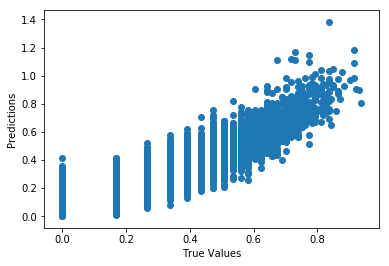

[  3.07735750e-10   1.68497517e-03   4.44490643e-04   6.51952493e-03
  -3.63109768e-03   1.00653442e-02   7.95405404e-04  -1.61240349e-05
   9.85662884e-05   4.92789525e-05   2.48356220e-04   2.88871385e-04
   5.84332959e-05  -5.53821423e-05  -5.89502248e-06   3.75327169e-03
  -1.55315054e-03  -4.46596493e-01   2.75659119e-01  -6.18882943e+01
  -1.14396387e+01  -3.75664120e+03   4.70218563e+03   7.50569544e-02
   2.66969793e-01   1.07910119e-04   2.72598977e-05  -1.71890668e-01
   1.30906434e-01   4.18146279e+01  -6.39247993e-02   1.43499551e-01
   4.08683978e-01  -2.30118399e-02  -5.85499289e-03  -7.84931125e-03]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.73717092  0.73358065  0.7378859   0.75242703  0.71638084  0.72085102
  0.7389678   0.71876267  0.73924874  0.75650977]


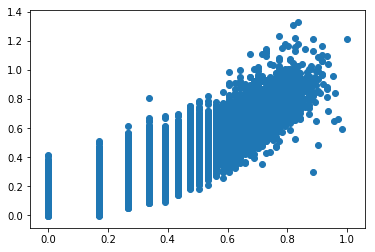

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.736222975178


In [9]:
print(lm.coef_)

[  3.07735750e-10   1.68497517e-03   4.44490643e-04   6.51952493e-03
  -3.63109768e-03   1.00653442e-02   7.95405404e-04  -1.61240349e-05
   9.85662884e-05   4.92789525e-05   2.48356220e-04   2.88871385e-04
   5.84332959e-05  -5.53821423e-05  -5.89502248e-06   3.75327169e-03
  -1.55315054e-03  -4.46596493e-01   2.75659119e-01  -6.18882943e+01
  -1.14396387e+01  -3.75664120e+03   4.70218563e+03   7.50569544e-02
   2.66969793e-01   1.07910119e-04   2.72598977e-05  -1.71890668e-01
   1.30906434e-01   4.18146279e+01  -6.39247993e-02   1.43499551e-01
   4.08683978e-01  -2.30118399e-02  -5.85499289e-03  -7.84931125e-03]
